# Entrenamiento Local

Este cuaderno entrena y valida un modelo de clasificación en un entorno local. Posteriormente, los pesos o el modelo resultante se utilizan en un flujo de Aprendizaje Federado

## Instalación de Dependencias
Se instalan librerías esenciales como TensorFlow, Matplotlib y scikit-learn para asegurar un entorno adecuado.



In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn

## Función train_and_verify
Ajusta el modelo con datos locales (local_data), especificando un número de épocas (epochs). Realiza predicciones y calcula métricas de clasificación (classification_report). Muestra gráficas de las pérdidas y accuracy durante el entrenamiento y validación.
Guarda el modelo entrenado en un archivo .keras.

In [15]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
def train_and_verify(local_model, local_data, epochs, x_test, y_test, save_name):
    
    history = local_model.fit(local_data[0], local_data[1], epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)


## Entrenamiento
Carga los datos desde archivos .npz: uno para el entrenamiento (mnist_part_2.npz) y otro para validación (mnist_validation_data.npz). Construye el modelo llamando a build_it() desde el módulo TheModel. Ejecuta la función train_and_verify.

c:\Users\cecyp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6545 - loss: 1.0812 - val_accuracy: 0.9597 - val_loss: 0.1316
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9593 - loss: 0.1282 - val_accuracy: 0.9675 - val_loss: 0.1040
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9733 - loss: 0.0833 - val_accuracy: 0.9737 - val_loss: 0.0808
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0651 - val_accuracy: 0.9757 - val_loss: 0.0715
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0443 - val_accuracy: 0.9765 - val_loss: 0.0684
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.94      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982

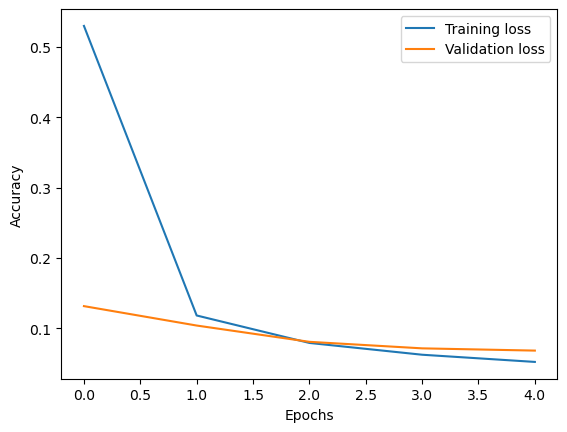

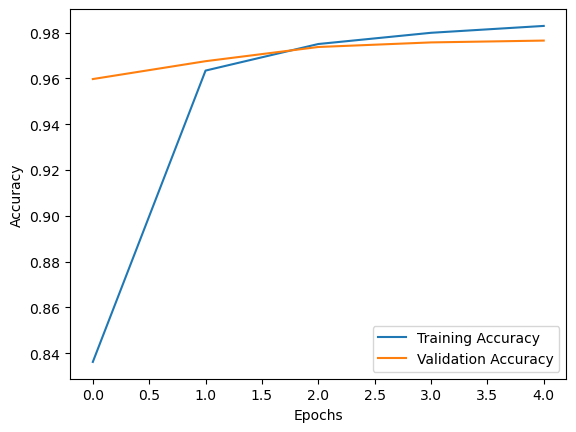

In [16]:
from TheModel import build
import tensorflow as tf

data = np.load('mnist_part_2.npz')
test = np.load('mnist_validation_data.npz')

local_model = build.build_it()
train_and_verify(local_model, [data['x'], data['y']], 5, test['x'], test['y'], "lmodel_2.keras")
